# Study

**Game sales forecast for 2017**

Information is given on sales of games of different ratings on various platforms in North America, Europe, Japan and other countries for several years.

**Purpose of the study:**

It is necessary to determine the factors influencing the success of the game. This will help forecast sales for 2017.

**Research progress:**

The data is contained in the games.csv file. Before proceeding with direct analysis, you should check the quality of the data. You need to change the original dataframe if there are awkwardly named columns, gaps, explicit and implicit duplicates, and outliers. You can then use histograms, scatter plots, and barcharts to evaluate the impact of factors on sales. You need to select a current time period for data analysis, create a portrait of users depending on the region, and check whether the average user ratings differ between the XOne and PC platforms, and between the Action and Sports genres.

## Opening the file

In [1]:
import pandas as pd

try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [2]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
pd.DataFrame(data.isna().mean()*100).style.background_gradient('coolwarm')

,0
Name,0.011965
Platform,0.000000
Year_of_Release,1.609333
Genre,0.011965
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.319174
User_Score,40.089740


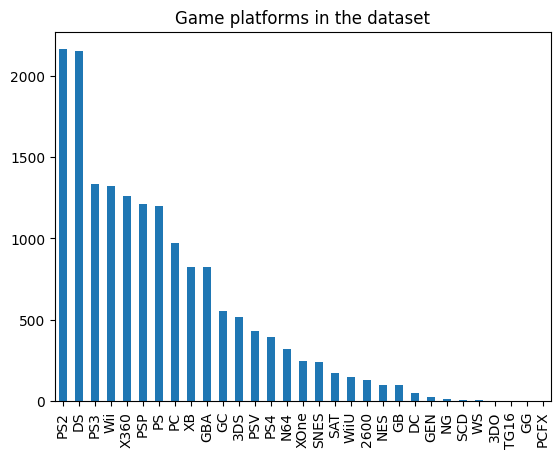

In [5]:
data['Platform'].value_counts().plot(kind='bar', title='Game platforms in the dataset');

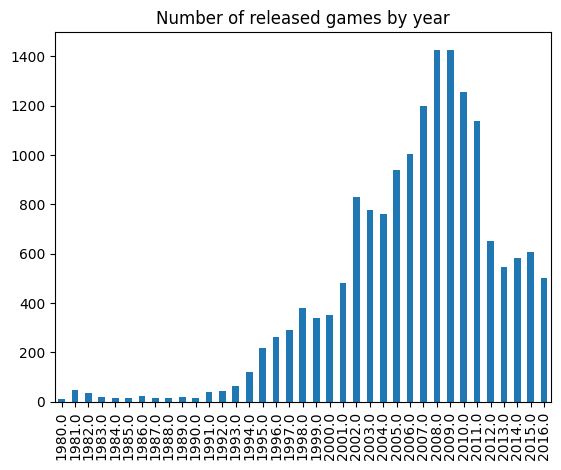

In [6]:
data['Year_of_Release'].value_counts().sort_index().plot(kind='bar', title='Number of released games by year');

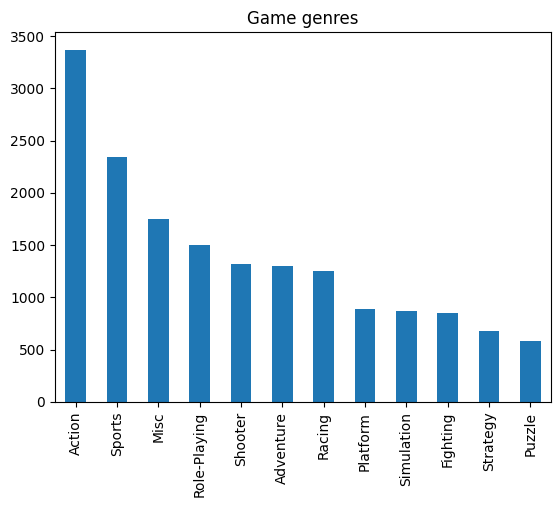

In [7]:
data['Genre'].value_counts().plot(kind='bar', title='Game genres');

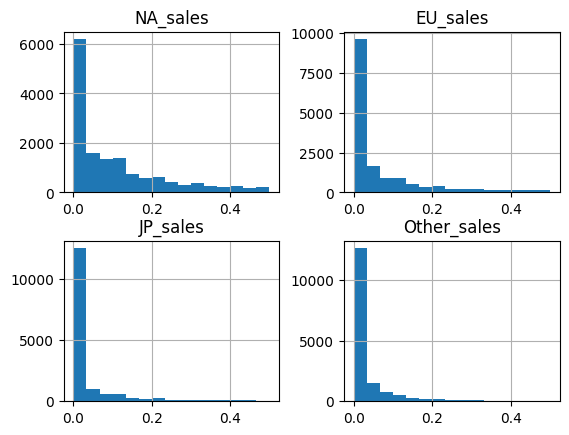

In [8]:
data[['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales']].hist(range=(0, 0.5), bins=15);

In [9]:
data[['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales']].describe().T

,count,mean,std,min,25%,50%,75%,max
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57


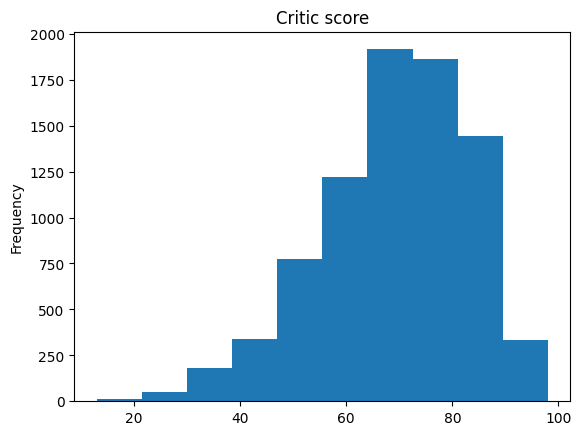

In [10]:
data['Critic_Score'].plot(kind='hist', title='Critic score');

Because the raw data for the User_Score column is of type object, we can only create a bar chart, not a histogram.

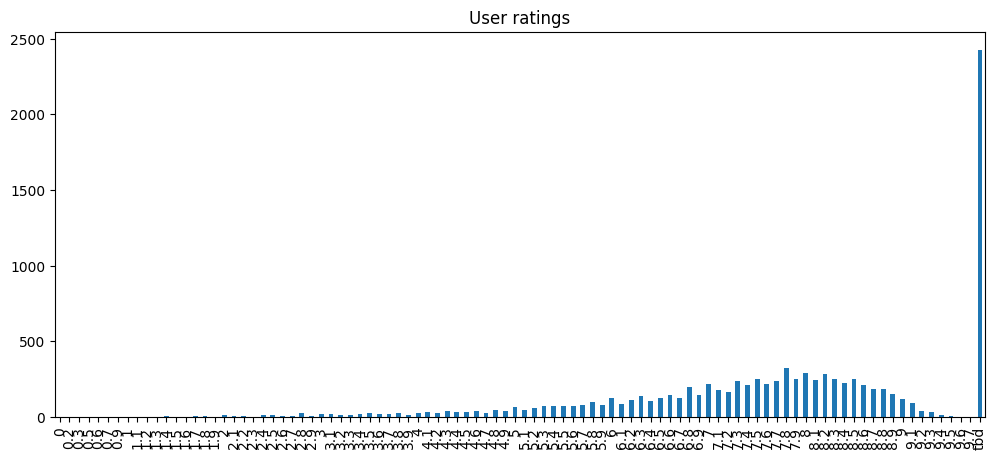

In [11]:
data['User_Score'].value_counts().sort_index().plot(kind='bar', title='User ratings', figsize=(12, 5));

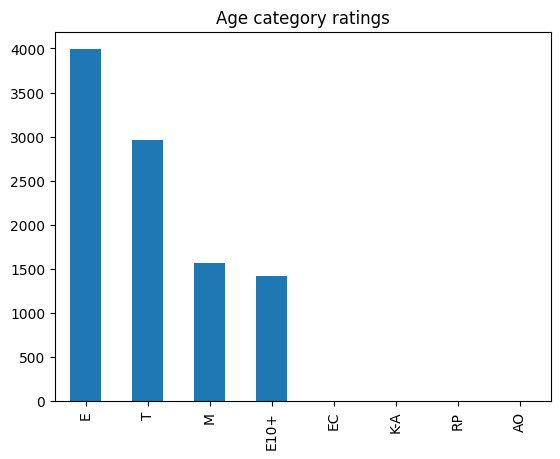

In [12]:
data['Rating'].value_counts().plot(kind='bar', title='Age category ratings');

In [13]:
data.duplicated().sum()

0

In [14]:
data['Name'].sort_values().nunique()/len(data)*100

69.15345498055639

In [15]:
data['Name'].str.lower().nunique()/len(data)*100

69.15345498055639

**Interim conclusion**:

It would be appropriate to reduce the column names to "snake" case.

The name column contains 2 blanks. They will most likely have to be removed.

No problems were found with the platform column. There are platforms that are practically not represented in the sample.

Less than 2% of the data in the year_of_release column contains gaps. Also the data type is float, but it is more logical to convert it to int, since year is a natural number. For some years there is relatively little data.

2 gaps in the genre column.

There are no gaps in the sales columns, but at least a quarter of the data is 0. This may be because sales are in the millions and no more than 100,000 were sold. We need to look into it in more detail. There are outliers.

Half of all critic_score column values are missing.

40% of values are missing in the user_score column. Moreover, a significant part of the column data is the 'tbd' or 'to be determined'. They will most likely have to be replaced with NaN. The data type must be converted to float or int.

40% of the rating column values are missing.

There are no obvious duplicates.

## Data preprocessing

To reduce the risk of making a mistake in the column name, let's reduce it to lower case.

In [16]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [17]:
data.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)
data.reset_index(drop=True, inplace=True)
print(data.isna().sum())
data.index

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64


RangeIndex(start=0, stop=16444, step=1)

In [18]:
import numpy as np

data['user_score'] = data['user_score'].where(data['user_score'] != 'tbd', np.nan)

In [19]:
data['user_score'] = data['user_score'].astype(float)
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [20]:
data['user_score'].isna().sum()

8981

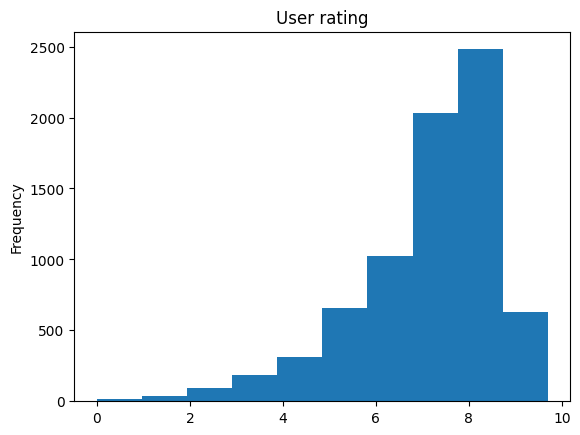

In [21]:
data['user_score'].plot(kind='hist', title='User rating');

In [22]:
data['year_of_release'] = data['year_of_release'].astype('int64')
data.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [23]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [24]:
data = data[(data['other_sales'] != 0) | (data['na_sales'] != 0) | (data['eu_sales'] != 0) | (data['jp_sales'] != 0)]

Column names are converted to snake case. Gaps in the name, genre, year_of_release columns were removed as they accounted for no more than 2% of the data. The user_score column 'tbd' values were converted to NaN and the data type was changed to float. The year_of_release column now contains an int data type. The gaps in the ratings were left unchanged as there was no sensible way to replace them. Only data for which total sales were positive were retained.

## Exploratory analysis

In [25]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [26]:
data['total_sales'].describe()

count    16442.000000
mean         0.536089
std          1.558869
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

Since 2002, many games have been released. To forecast sales for 2017, we need to limit ourselves to approximately this time interval. Further charts will clarify the details.

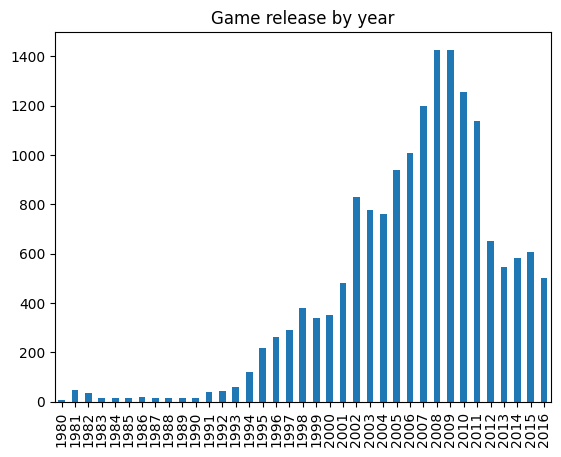

In [27]:
data['year_of_release'].value_counts().sort_index().plot(kind='bar', title='Game release by year');

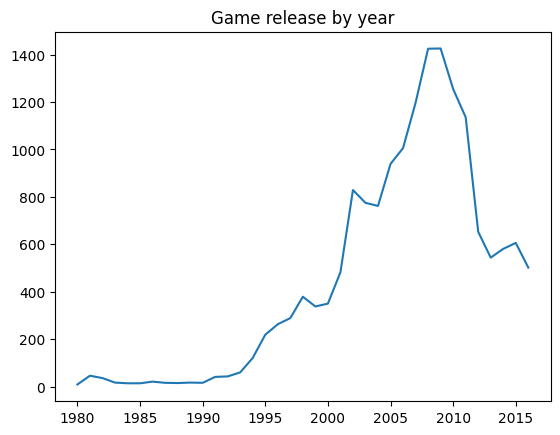

In [28]:
data['year_of_release'].value_counts().sort_index().plot(title='Game release by year');

The platform remains on the market for an average of ~7 years.

In [29]:
data.pivot_table(index='platform', columns='year_of_release', 
                 values='total_sales', aggfunc='sum').T.count().mean()

7.67741935483871

The top 10 cash register platforms “live” for almost 10 years on average.

In [30]:
data.pivot_table(index='platform', columns='year_of_release', 
                 values='total_sales', aggfunc='sum', margins=True) \
    .sort_values(by='All').tail(11) \
    .drop(index='All', columns='All').T.count().mean()

9.7

There are enough games released on PC and XB, but as you can see in the next chart, these platforms are not the top grossing ones.

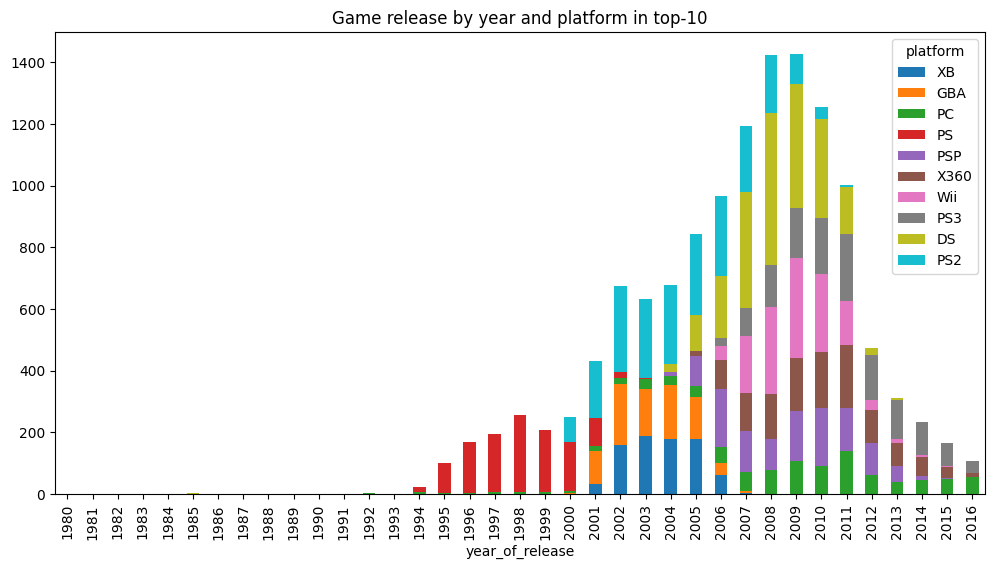

In [31]:
pd.crosstab(data['platform'], 
            data['year_of_release'], 
            margins=True).sort_values(by='All') \
    .drop(index='All', columns='All').tail(10).T \
    .plot(kind='bar', stacked=True, 
          title='Game release by year and platform in top-10', 
          figsize=(12, 6));

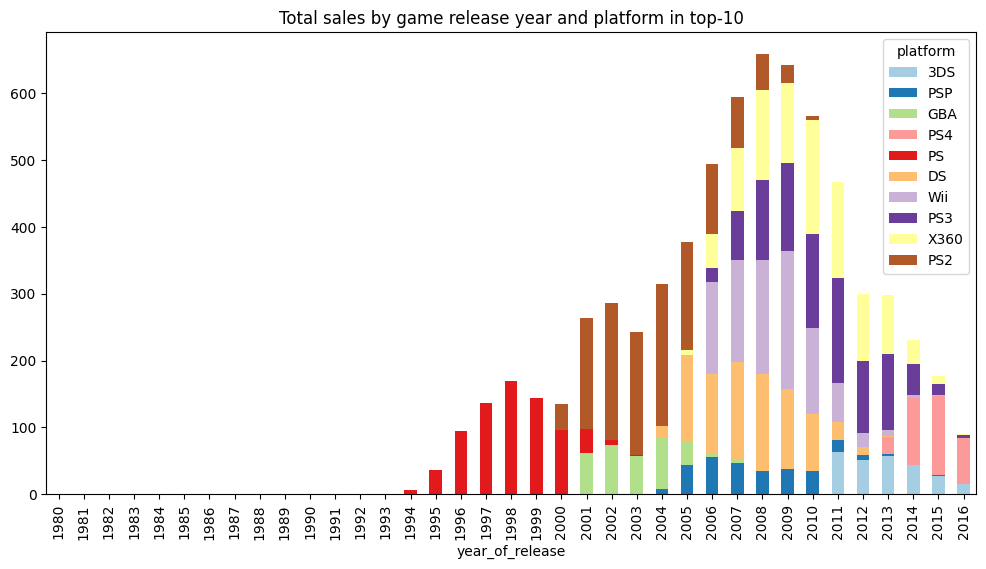

In [32]:
(data
 .pivot_table(index='platform', 
              columns='year_of_release', 
              values='total_sales',
              aggfunc='sum',
              fill_value=0, 
              margins=True)
 .sort_values(by='All')
 .tail(11)
 .drop(index='All', columns='All')
 .T
 .plot(kind='bar', stacked=True, figsize=(12, 6), 
       title='Total sales by game release year and platform in top-10', 
       colormap='Paired')
);

The emergence of new and exit from the market of old gaming platforms can be divided into intervals of 5 years.

1995-2000: PS platform dominates the market.

2000-2005: PS2 replaces PS, new GBA platform appears.

2005-2010: PS3 and PSP are introduced, the market is divided by Wii, X360, DS. The GBA is becoming less popular.

2010-2016: new PS4 and 3DS appear. The leaders of the previous period are gradually leaving the market.

PS2, PS3, X360 lead the longest and remain on the market.

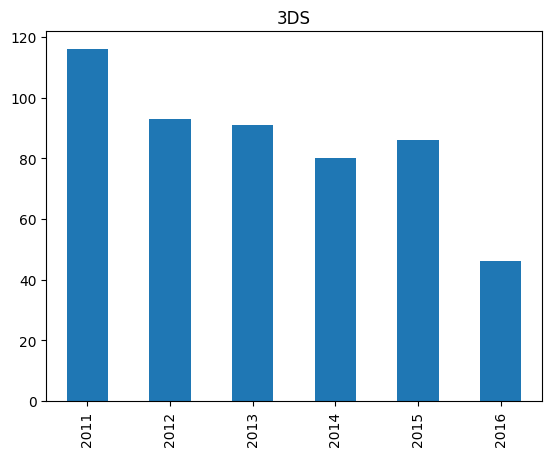

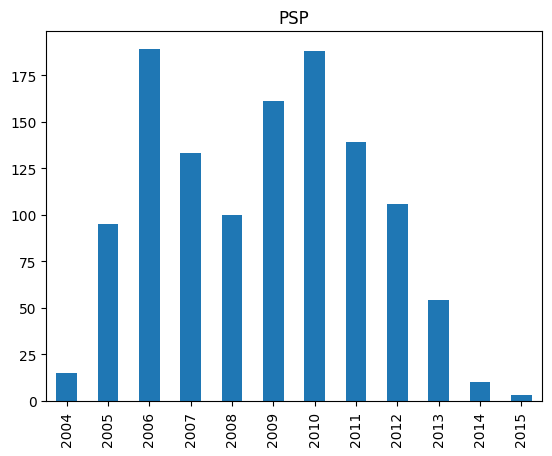

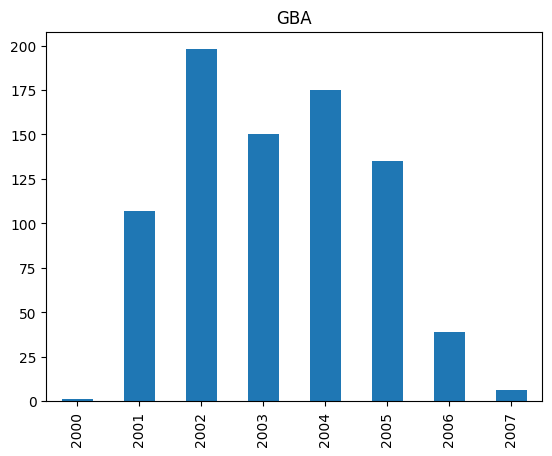

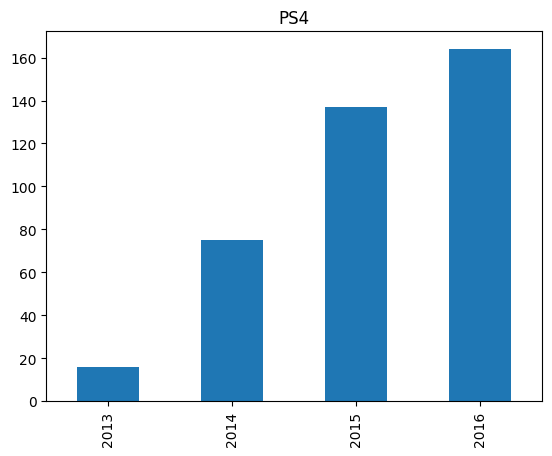

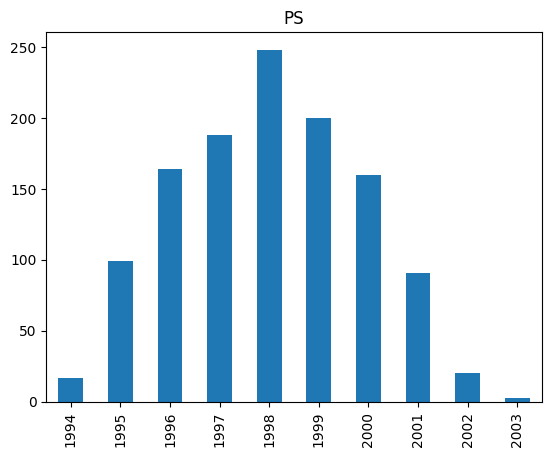

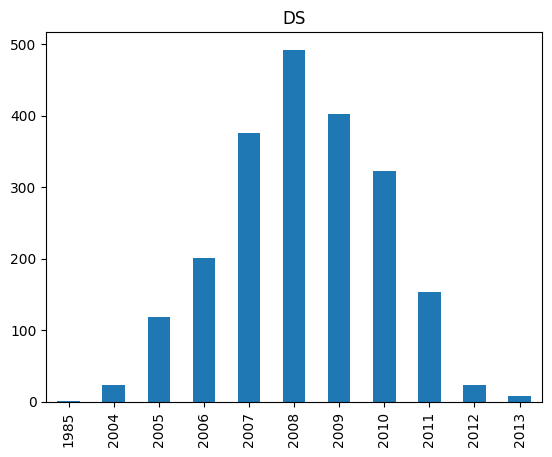

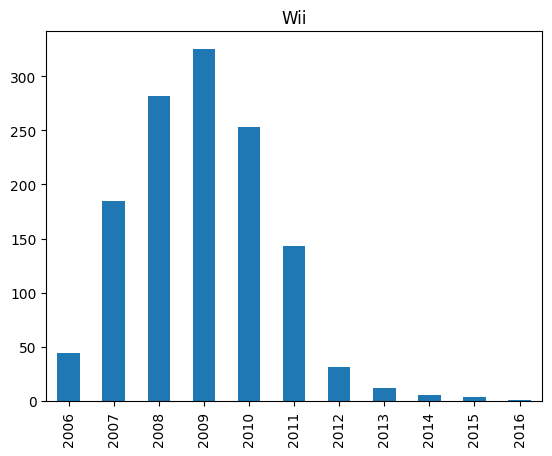

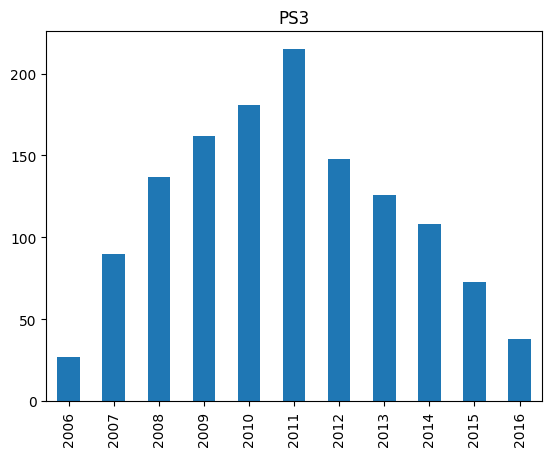

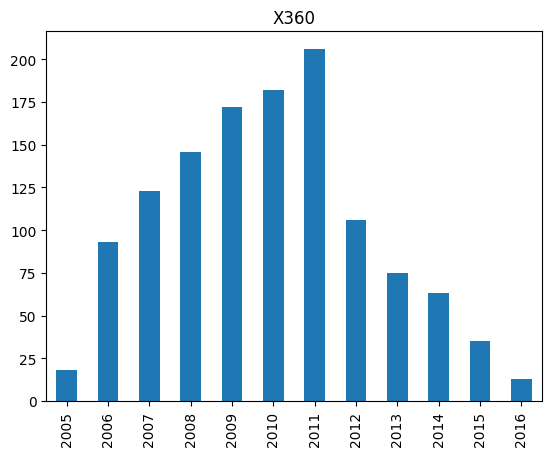

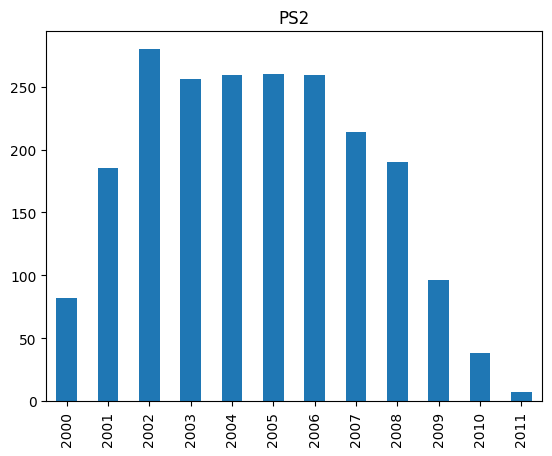

In [33]:
from matplotlib import pyplot as plt
for platform in data.groupby('platform')['total_sales'].sum().sort_values().tail(10).index:
    data.query('platform == @platform')['year_of_release'] \
        .value_counts() \
        .sort_index() \
        .plot(kind='bar', title=platform)
    plt.show();

Below is a list of platforms that are still around in 2016. With the exception of computer games, the rest began their development after 2005. It makes sense to limit ourselves only to this period. (This period will also include data on “extinct” platforms).

In [34]:
data.groupby('platform').agg({'total_sales': 'sum', 
                              'year_of_release': ['min', 'max']}) \
    .sort_values(by=('year_of_release', 'max')).tail(9) \
    .sort_values(by=('total_sales', 'sum'))

total_sales year_of_release      
                 sum             min   max
platform                                  
PSV            53.81            2011  2016
WiiU           82.19            2012  2016
XOne          159.32            2013  2016
PC            255.76            1985  2016
3DS           257.81            2011  2016
PS4           314.14            2013  2016
Wii           891.18            2006  2016
PS3           931.34            2006  2016
X360          961.24            2005  2016

In [35]:
data = data[data['year_of_release'] >= 2014]
len(data)

1689

Sales are down across all platforms.

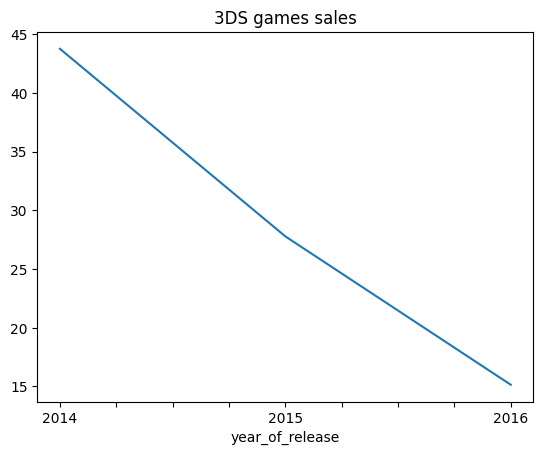

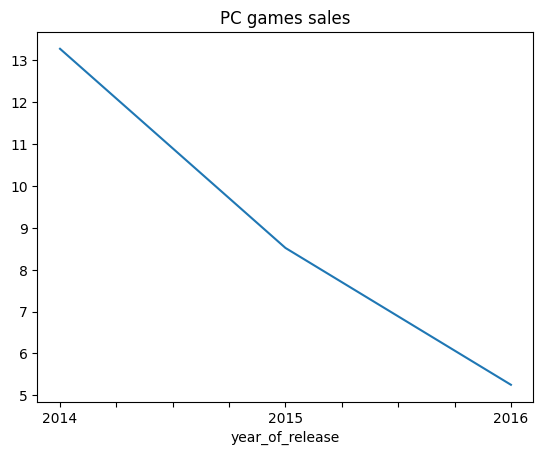

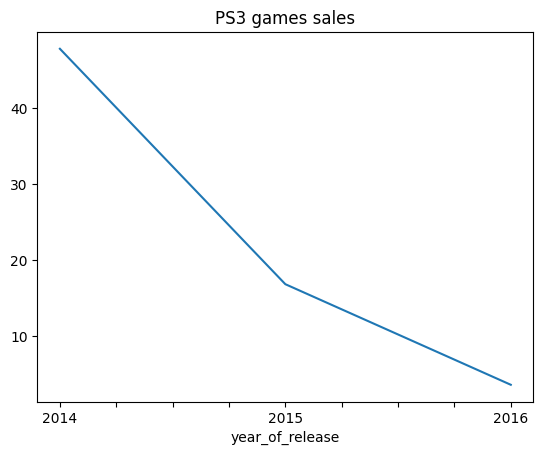

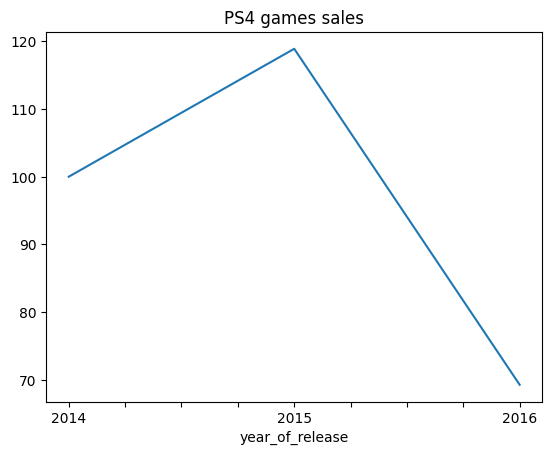

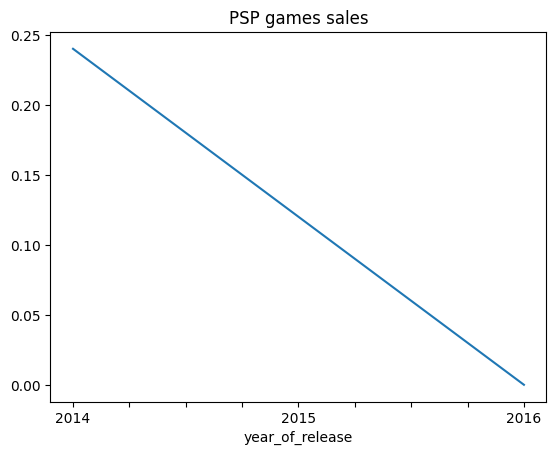

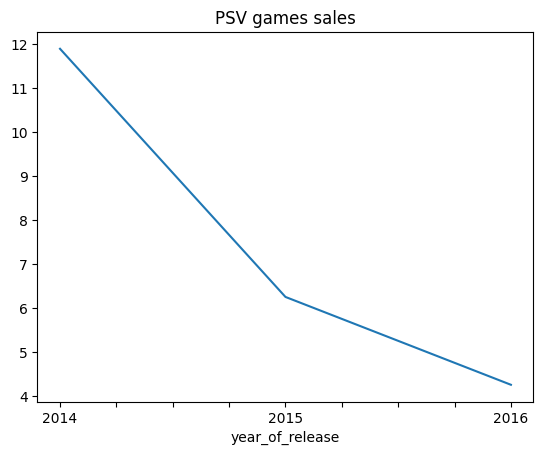

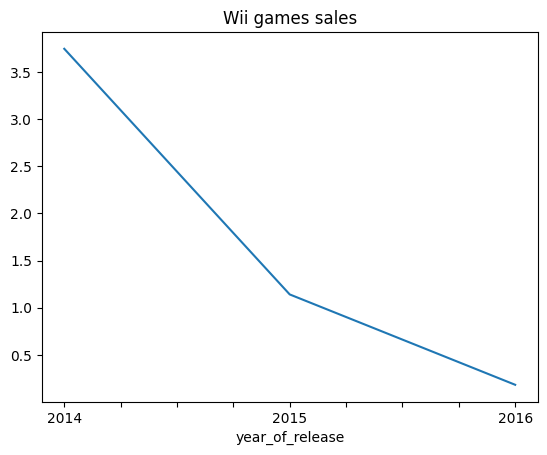

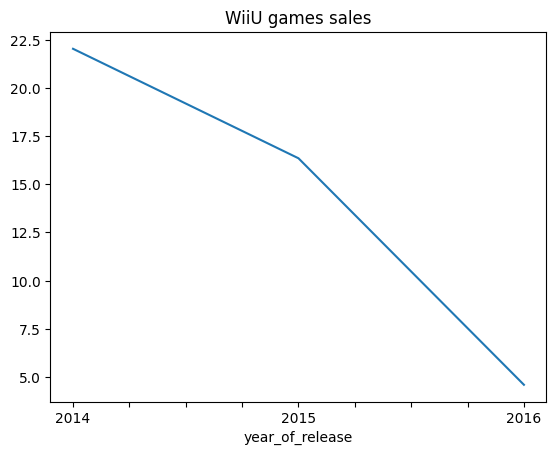

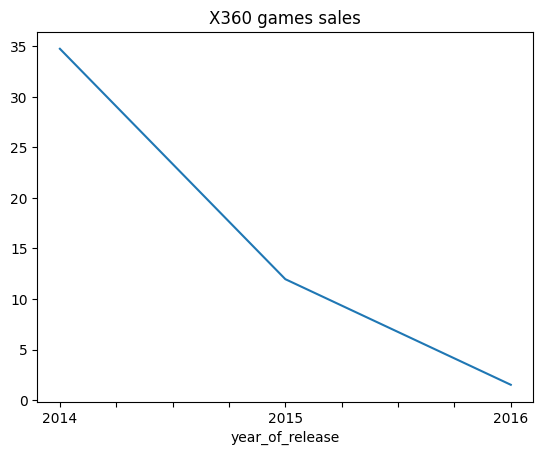

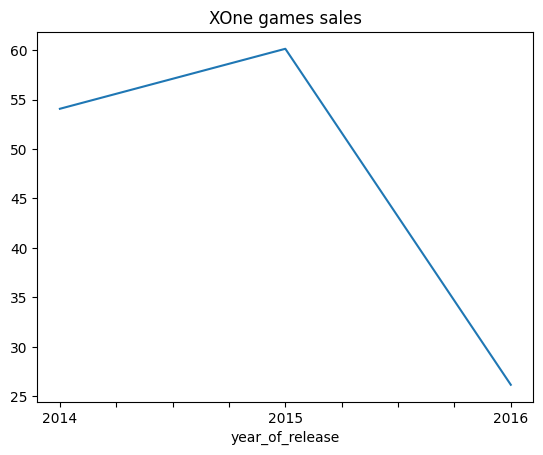

In [36]:
table = data.pivot_table(index='year_of_release', 
                         columns='platform', 
                         values='total_sales', 
                         aggfunc='sum', fill_value=0)
table.index = table.index.astype('str')

for column in table.columns:
    
    table[column].plot(title=f'{column} games sales')
    plt.show();

The table also roughly shows that PS4, XOne, 3DS are still among the top three grossing gaming platforms. Therefore, they are the most potentially profitable.

In [37]:
table.T['2016'].sort_values().tail(3)

platform
3DS     15.14
XOne    26.15
PS4     69.25
Name: 2016, dtype: float64

Since 2005, the platforms with the largest coverage of grossing games have become X360, XOne, PS4, WiiU.

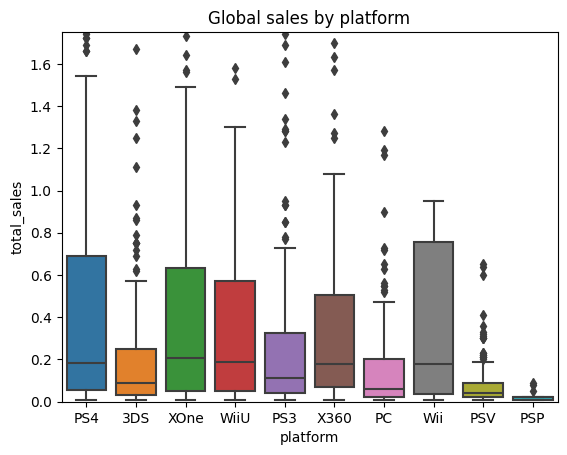

In [38]:
import seaborn as sns

sns.boxplot(data=data, x='platform', y='total_sales')
plt.ylim(0, 1.75)
plt.title('Global sales by platform');

Sales are weakly dependent on critics' ratings. The correlation is only 0.4.

Sales do not depend linearly on user ratings.

Correlation coefficient 0.40266141068104083


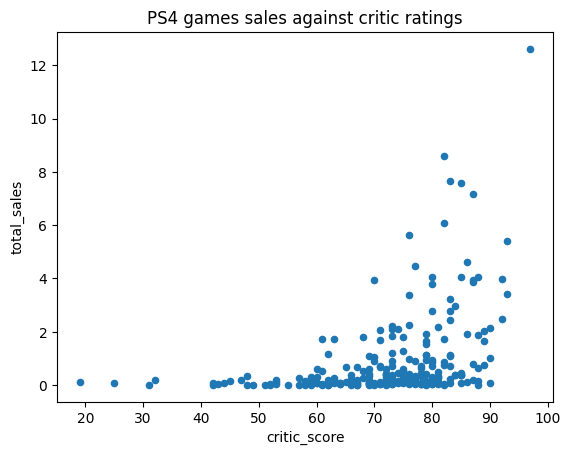

Correlation coefficient -0.040131589472697356


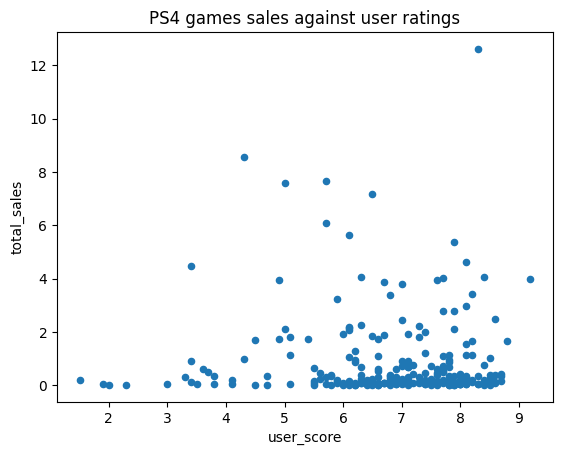

In [39]:
print('Correlation coefficient', 
      data.query('platform == "PS4"')['total_sales'].corr(data.query('platform == "PS4"')['critic_score']))
data.query('platform == "PS4"').plot(kind='scatter', 
                                     x='critic_score', 
                                     y='total_sales', 
                                     title='PS4 games sales against critic ratings')
plt.show()

print('Correlation coefficient',
      data.query('platform == "PS4"')['total_sales'].corr(data.query('platform == "PS4"')['user_score']))
data.query('platform == "PS4"').plot(kind='scatter',
                                     x='user_score', 
                                     y='total_sales', 
                                     title='PS4 games sales against user ratings')
plt.show();

Critic or user ratings have little impact on overall game sales, regardless of platform.

In [40]:
for platform, group in data.groupby('platform'):
    print(platform)
    print('Correlation between sales and critic ratings:', 
          group['total_sales'].corr(group['critic_score']))
    
    print('Correlation between sales and user ratings:', 
          group['total_sales'].corr(group['user_score']))
    print()

3DS
Correlation between sales and critic ratings: 0.31411749286905105
Correlation between sales and user ratings: 0.2151932718527028

PC
Correlation between sales and critic ratings: 0.17463413769350036
Correlation between sales and user ratings: -0.07159665703472452

PS3
Correlation between sales and critic ratings: 0.44657460493190704
Correlation between sales and user ratings: -0.16676141347662116

PS4
Correlation between sales and critic ratings: 0.40266141068104083
Correlation between sales and user ratings: -0.040131589472697356

PSP
Correlation between sales and critic ratings: nan
Correlation between sales and user ratings: nan

PSV
Correlation between sales and critic ratings: 0.04266490657009526
Correlation between sales and user ratings: -0.16845504978064446

Wii
Correlation between sales and critic ratings: nan
Correlation between sales and user ratings: 1.0

WiiU
Correlation between sales and critic ratings: 0.370201412480884
Correlation between sales and user ratings: 0.4

By 2016, the top grossing genres remain Sports, Shooter, and Role-Playing. The games Adventure and Puzzle are selling poorly.

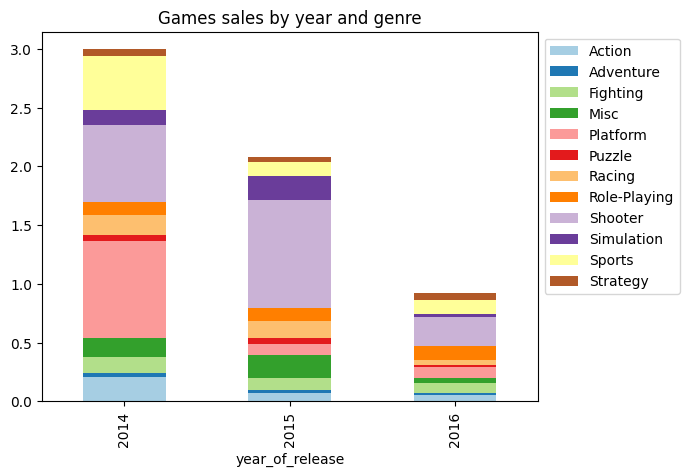

In [41]:
data.pivot_table(columns='genre', 
                 index='year_of_release', 
                 values='total_sales', 
                 aggfunc='median').plot(kind='bar', 
                                        stacked=True, 
                                        title='Games sales by year and genre', 
                                        colormap='Paired').legend(bbox_to_anchor =(1, 1));

**Interim conclusion**:

Relatively many games began to be released in 2002, with the most released in 2008 and 2009.

Gaming platforms change over the years and on average “live” 7 years, cash platforms - 9 years. The platforms that release the most games tend to release the highest-grossing games. The exception is computer games that are not in the top 10 best-selling. By 2016, the PS4 dominates the market. The X360, XOne, PS3, PS4, WiiU platforms cover more grossing games than others.

Sales are weakly dependent on critics' ratings and, as a rule, do not depend linearly on user ratings.

Shooters are the best-selling genre of games.

## User profile by region

The most popular platforms among North American users are PS4, XOne. The most popular platform among Europeans is PS4. The choice of gaming platforms is very different among the Japanese. 3DS is the most popular among them

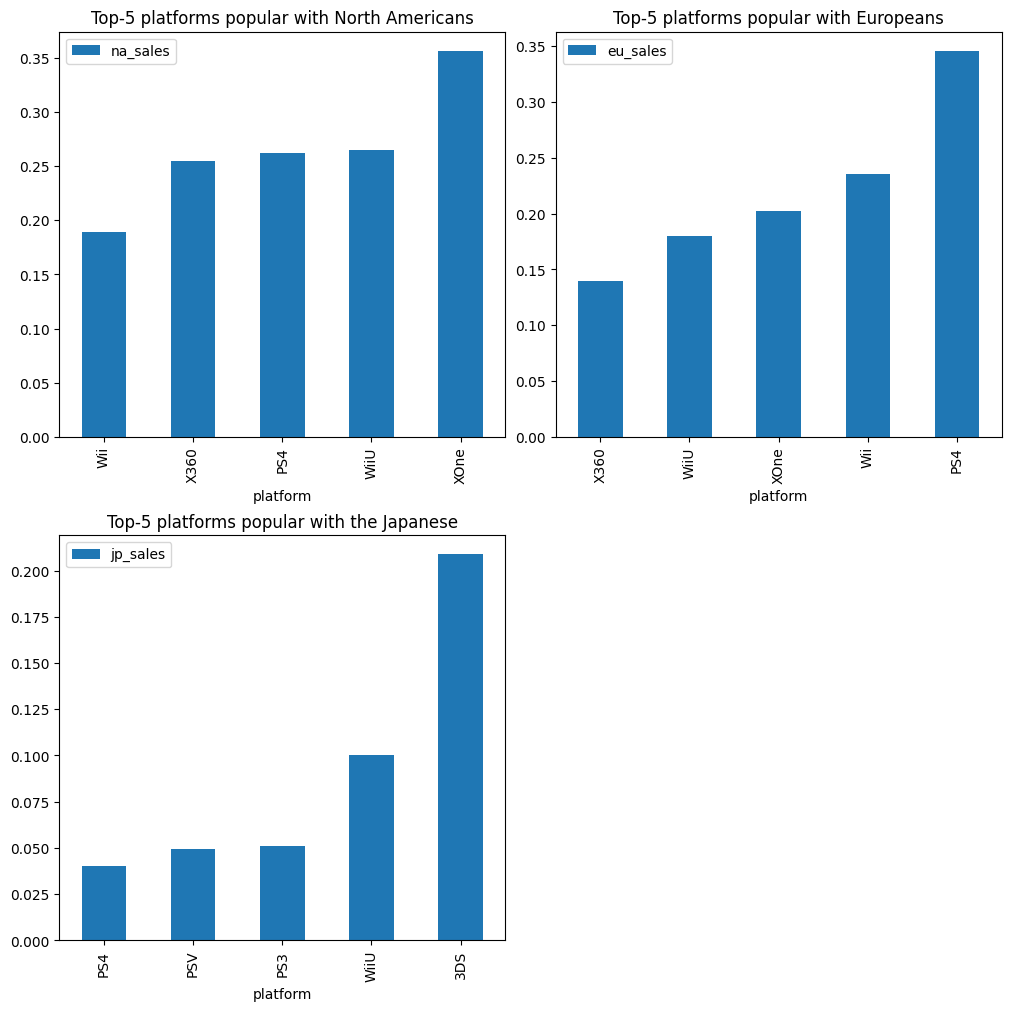

In [42]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), layout='constrained')

ax[1, 1].set_axis_off()

data.pivot_table(index='platform', values='na_sales') \
    .sort_values(by='na_sales').tail(5) \
    .plot(kind='bar', 
          title='Top-5 platforms popular with North Americans', ax=ax[0, 0])

data.pivot_table(index='platform', values='eu_sales') \
    .sort_values(by='eu_sales').tail(5) \
    .plot(kind='bar', 
          title='Top-5 platforms popular with Europeans', ax=ax[0, 1])

data.pivot_table(index='platform', values='jp_sales') \
    .sort_values(by='jp_sales').tail(5) \
    .plot(kind='bar', 
          title='Top-5 platforms popular with the Japanese', ax=ax[1, 0]);

Below you can see the most popular genres among Americans. "Shooters" are much more popular than all the others. Europeans differ little from Americans in their choice of game genre. However, they like Fighting games much less. The top five most popular genres for the Japanese include Role-Playing, Puzzle, Simulation, Action, Platform. The choice of genres is very different for players from Europe or America.

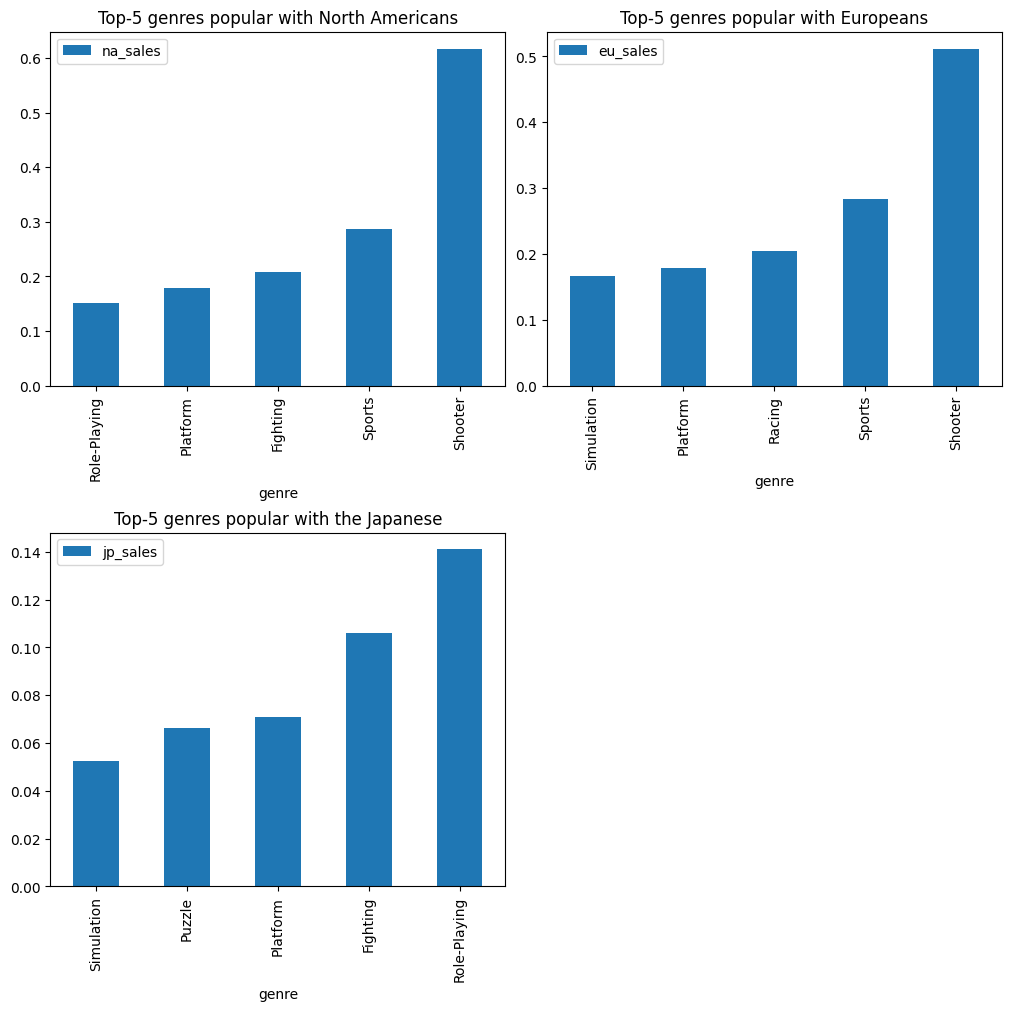

In [43]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), layout='constrained')

ax[1, 1].set_axis_off()

data.pivot_table(index='genre', values='na_sales') \
    .sort_values(by='na_sales').tail(5) \
    .plot(kind='bar', 
          title='Top-5 genres popular with North Americans', ax=ax[0, 0])

data.pivot_table(index='genre', values='eu_sales') \
    .sort_values(by='eu_sales').tail(5) \
    .plot(kind='bar', 
          title='Top-5 genres popular with Europeans', ax=ax[0, 1])

data.pivot_table(index='genre', values='jp_sales') \
    .sort_values(by='jp_sales').tail(5) \
    .plot(kind='bar', 
          title='Top-5 genres popular with the Japanese', ax=ax[1, 0]);

Europeans do not differ much in their choice of game platform, genre or rating. Both of them love the shooters they play on the X360 or PS4. They prefer games with a more mature rating.

The Japanese differ from Europeans and Americans in their choice of platform, game genre and rating. They love the Role-Playing genre and the 3DS platform. The Japanese prefer games without ratings. That is, the game rating affects them slightly. That must be because the age ratings are European or American

In [44]:
data['rating'].fillna('No Rating', inplace=True)

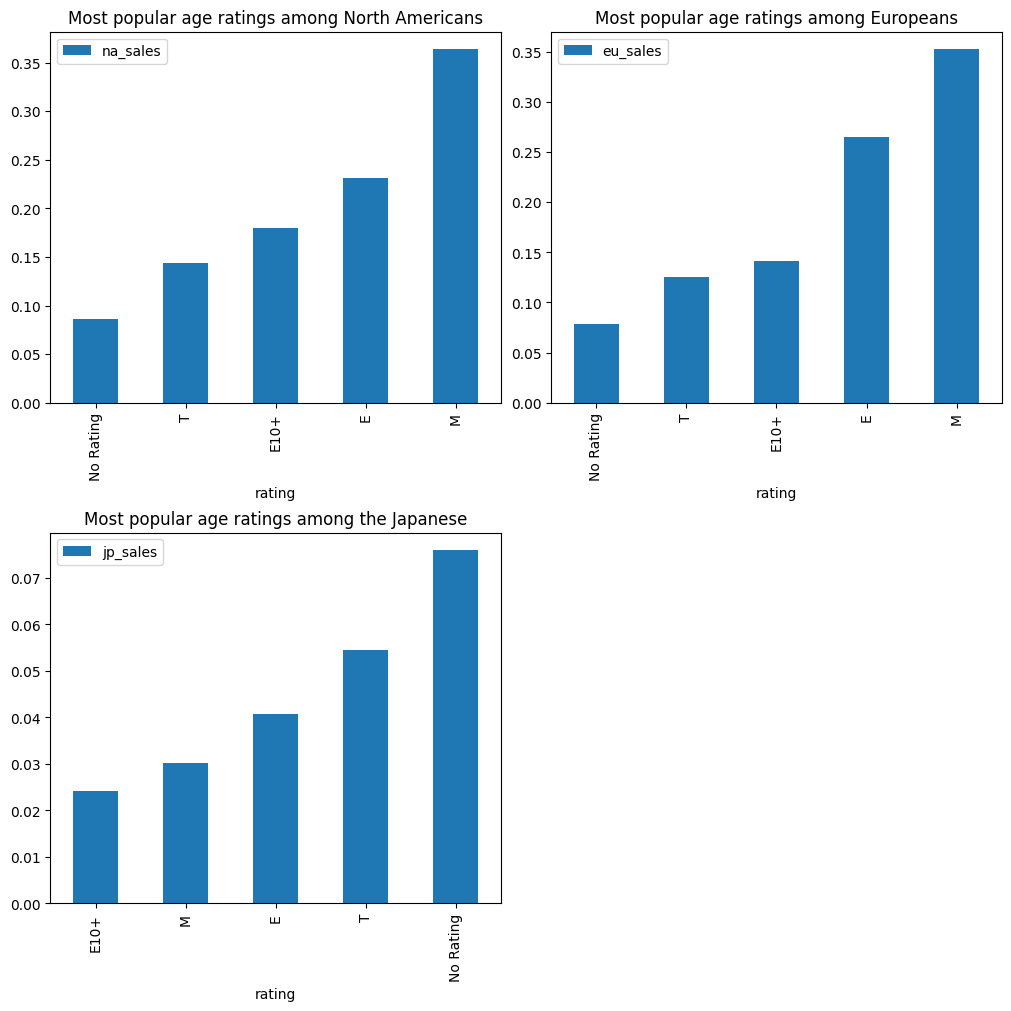

In [45]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), layout='constrained')

ax[1, 1].set_axis_off()

data.pivot_table(index='rating', values='na_sales') \
    .sort_values(by='na_sales') \
    .plot(kind='bar', title='Most popular age ratings among North Americans', ax=ax[0, 0])

data.pivot_table(index='rating', values='eu_sales') \
    .sort_values(by='eu_sales') \
    .plot(kind='bar', title='Most popular age ratings among Europeans', ax=ax[0, 1])

data.pivot_table(index='rating', values='jp_sales') \
    .sort_values(by='jp_sales') \
    .plot(kind='bar', title='Most popular age ratings among the Japanese', ax=ax[1, 0]);

## Hypotheses

### Platforms

H_0: average XOne user rating = average PC user rating

H_1: average rating of XOne users != average rating of PC users

Since there are many games (59 in total, see below) that were released on both platforms, the samples are dependent. It makes sense to test the hypothesis either on a sample with dependence using ttest_rel, or on a sample without these 59 games using ttest_ind. Since there is more data in the second case, we will select the latter.

In [46]:
data.query('platform  == "PC"') \
    .merge(data.query('platform == "XOne"'), 
           on='name', 
           how='inner')[['name', 'platform_x', 'platform_y', 'user_score_x', 'user_score_y']]

,name,platform_x,platform_y,user_score_x,user_score_y
0,Fallout 4,PC,XOne,5.4,6.2
1,Farming Simulator 2015,PC,XOne,NaN,NaN
2,Grand Theft Auto V,PC,XOne,7.9,7.9
3,The Elder Scrolls Online,PC,XOne,5.7,8.4
4,Dragon Age: Inquisition,PC,XOne,5.9,6.9
...,...,...,...,...,...
84,TrackMania Turbo,PC,XOne,6.8,7.7
85,Ride 2,PC,XOne,7.9,8.2
86,Rugby World Cup 2015,PC,XOne,1.4,4.3
87,The Amazing Spider-Man 2 (2014),PC,XOne,NaN,NaN


In [47]:
dependent = list(data.query('platform  == "PC"').merge(data.query('platform == "XOne"'), on='name', how='inner')['name'])

hyp_data = data[~data['name'].isin(dependent)].query('platform in ["PC", "XOne"]')

In [48]:
import scipy.stats as st

results = st.ttest_ind(hyp_data.loc[hyp_data['platform'] == "PC", 'user_score'], 
                       hyp_data.loc[hyp_data['platform'] == "XOne", 'user_score'], 
                       equal_var=False, 
                       nan_policy='omit')
print(results.pvalue)
alpha = 0.5

if results.pvalue < alpha:
    print("Rejecting the Null-hypothesis")
else:
    print("Can't reject the Null-hypothesis")

0.8259486681960906
Can't reject the Null-hypothesis


The average user rating on the XOne platform differs slightly from the rating given by users on the PC platform.

### Genres

H_0: Average user rating for the Action genre = Average user rating for the Sports genre

H_1: Average user rating for the Action genre != Average user rating for the Sports genre

Since there are no dependencies, we can use the ttest_ind(equal_var=False) method

In [49]:
data.query('genre  == "Action"') \
    .merge(data.query('genre == "Sports"'), 
           on='name', 
           how='inner')[['name', 'genre_x', 'genre_y', 'user_score_x', 'user_score_y']]

,name,genre_x,genre_y,user_score_x,user_score_y


In [50]:
results = st.ttest_ind(data.loc[data['genre'] == 'Action', 'user_score'],
                       data.loc[data['genre'] == 'Sports', 'user_score'],
                       equal_var=False,
                       nan_policy='omit')
print(results.pvalue)
alpha = 0.05

if results.pvalue < alpha:
    print("Rejecting the Null-hypothesis")
else:
    print("Can't reject the Null-hypothesis")

1.1825550382644557e-14
Rejecting the Null-hypothesis


There is a statistically significant difference between the average user ratings for the Action and Sports genres.

## Conclusion

Gaming platforms change over the years and on average “live” 7 years, cash platforms - 9 years. The XOne, X360, PS4, WiiU platforms cover more grossing games than others. Games on the computer are released steadily, but they do not become the highest grossing ones. The most potentially profitable platforms are PS4, Xone, 3DS.

In Europe and North America, the most popular platforms are the X360 and PS4. Shooters are the best-selling genre of games. Also, games with more mature ratings have higher average sales among these users.

The Japanese differ from other users in their choice of platform, game genre and rating. They love the Role-Playing genre and the 3DS platform. The Japanese prefer unrated games.

User ratings vary depending on the genre. However, sales are weakly dependent on critic ratings and generally do not vary linearly with user ratings.

The average user rating for PC and XOne games don't differ significantly. Action and Sports genres, however, have significantly different average user ratings